# _Regression notebook_

### Questions we would like to answer:
1. Regression question - what is the price of a car given the information available on it?
2. Which technique (model) is best suited for this data and why?
3. Is it possible to create new features from the existing data to improve the models?
4. Which features are the most significant for predicting the price of a second hand car?

# <ins> A. Task definition and general information </ins> 

## Regression task - Predict Car Selling Price

### general knowledge about the dataset:
This dataset contains information about used cars listed on www.cardekho.com and published on Kaggle.

The columns in the given dataset is as follows:

- Car_Name
- Year (of manufacture)
- Selling_Price
- Buying_Price
- Kms_Driven
- Fuel_Type
- Seller_Type
- Transmission
- Owner

# <ins> B. Basic familiarity with the Dataset </ins>

### imports

In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

plt.style.use('seaborn')

In [57]:
df = pd.read_csv("car_data_ml.csv")
df.rename(columns = {'Owner':'Past_Owners'},inplace = True)
df

,Car_Name,Year,Selling_Price,Buying_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## attributes information

<br>
let's take a look at the attributes categories:

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Buying_Price   299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Past_Owners    299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.1+ KB


In [59]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Buying_Price     False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Past_Owners      False
dtype: bool

### Basic information about the data:

In [60]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Buying_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners
count,299,299.000000,299.000000,299.000000,299.000000,299,299,299,299.000000
unique,98,NaN,NaN,NaN,NaN,2,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,193,259,NaN
mean,NaN,2013.632107,4.671739,7.636589,36908.397993,NaN,NaN,NaN,0.043478
std,NaN,2.896151,5.098210,8.671821,39009.724028,NaN,NaN,NaN,0.248720
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.850000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.650000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48383.500000,NaN,NaN,NaN,0.000000


### let's take a look at the numeric attributes histograma:

array([[<AxesSubplot:title={'center':'Kms_Driven'}>,
        <AxesSubplot:title={'center':'Buying_Price'}>],
       [<AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Year'}>]], dtype=object)

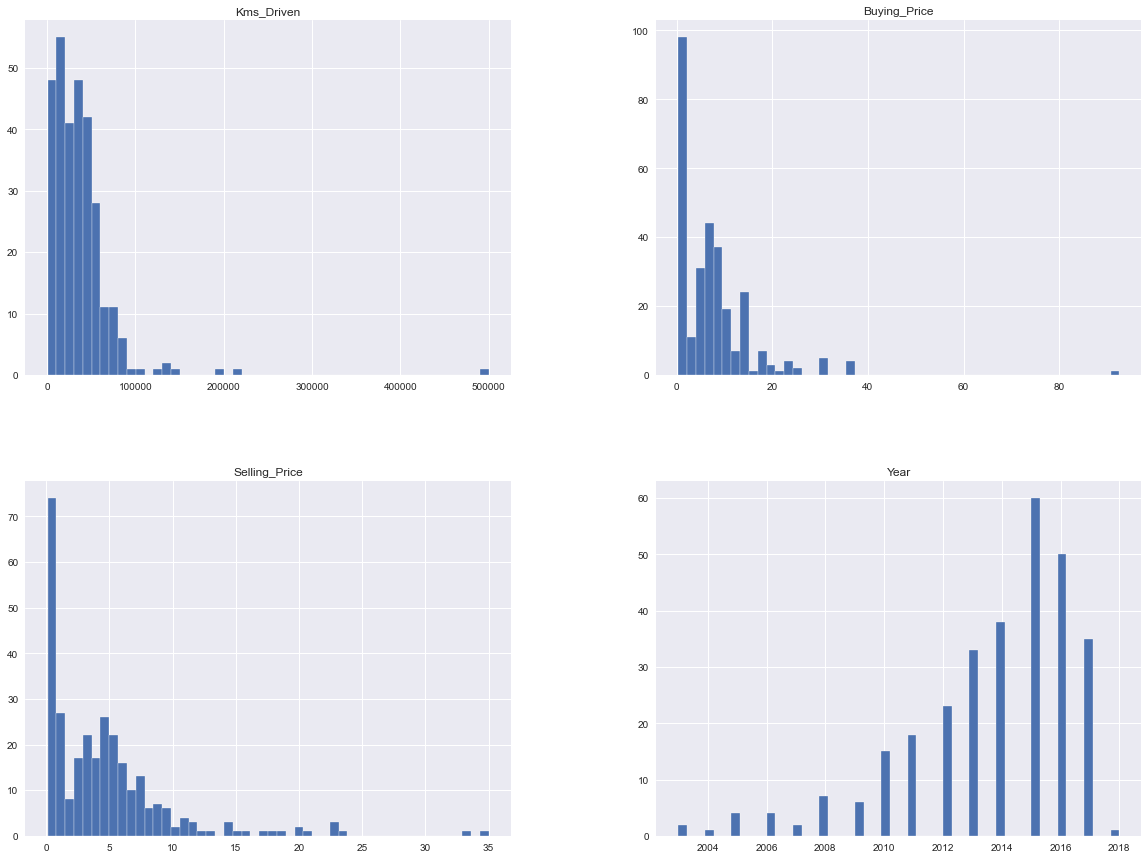

In [61]:
atttibutes_hist = df[["Kms_Driven", "Buying_Price", "Selling_Price", "Year"]].hist(bins=50, figsize=(20,15))
atttibutes_hist

#### let's look at the categorial attributes histograma (as pies):


Text(0.5, 1.0, 'number of Past Owners:')

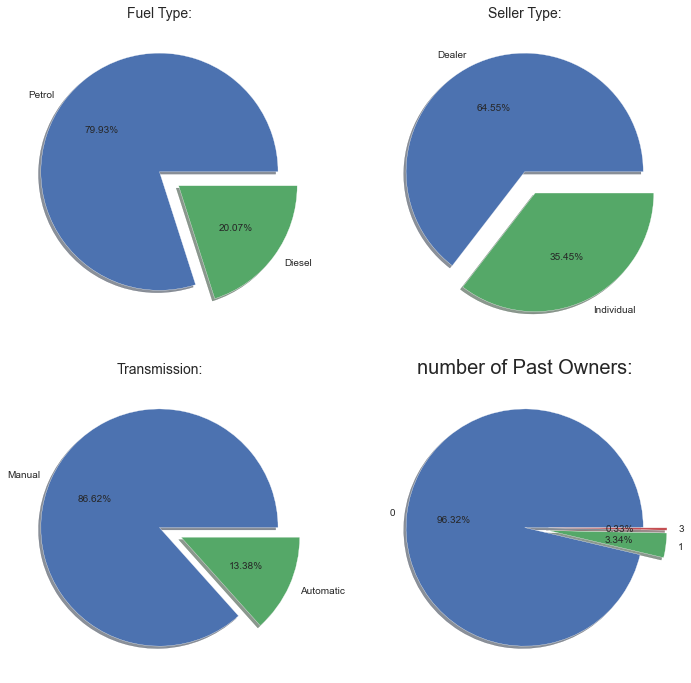

In [62]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = df['Fuel_Type'].value_counts().index.tolist()
values = df['Fuel_Type'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax1.set_title("Fuel Type:", fontdict={'fontsize': 14})

labels = df['Seller_Type'].value_counts().index.tolist()[:2]
values = df['Seller_Type'].value_counts().tolist()[:2]
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax2.set_title("Seller Type:", fontdict={'fontsize': 14})

labels = df['Transmission'].value_counts().index.tolist()[:2]
values = df['Transmission'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax3.set_title("Transmission:", fontdict={'fontsize': 14})

labels = df['Past_Owners'].value_counts().index.tolist()
values = df['Past_Owners'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2, 0.2])
ax4.set_title("number of Past Owners:", fontdict={'fontsize': 20})


# <ins> C. Clean and prepare the data </ins>  

## - Handeling text and categorial attributes

#### first of all, We will use "get_dummies" function to "convert" every categorial attribute.

In [63]:
df_copy = df.copy() # save for later use
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])
df

,Car_Name,Year,Selling_Price,Buying_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,0,1,0,1,0,0,1
295,brio,2015,4.00,5.90,60000,0,0,1,1,0,0,1
296,city,2009,3.35,11.00,87934,0,0,1,1,0,0,1
297,city,2017,11.50,12.50,9000,0,1,0,1,0,0,1


#### The year coulmn is not generalize, so we will generate it to Age. this is a better information.

In [64]:
df['Car_Age']= 2019-df['Year'] # the dataset is from 2019

#### We will drop the names and year columns.
It is true that in theory the names can give us a good information, but we have only 300 rows and 98 uniqe names, so, not in this case.

In [65]:
df.drop(columns=['Car_Name'], inplace=True)
df.drop(columns=['Year'], inplace=True)

In [66]:
df.head(3)

,Selling_Price,Buying_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
0,3.35,5.59,27000,0,0,1,1,0,0,1,5
1,4.75,9.54,43000,0,1,0,1,0,0,1,6
2,7.25,9.85,6900,0,0,1,1,0,0,1,2


In [67]:
pd.DataFrame(data={'features': df.columns})

,features
0,Selling_Price
1,Buying_Price
2,Kms_Driven
3,Past_Owners
4,Fuel_Type_Diesel
5,Fuel_Type_Petrol
6,Seller_Type_Dealer
7,Seller_Type_Individual
8,Transmission_Automatic
9,Transmission_Manual


<br>

# <ins>D. Dig into the DATA - correlations and patterns</ins>

## Let's try so uncover some patterns.

#### although linear correlations are not the only correlations we can find, it can gives us a good start. We will use Pearson’s correlation coefficient in the next matrixes.

### Correlation Matrix:

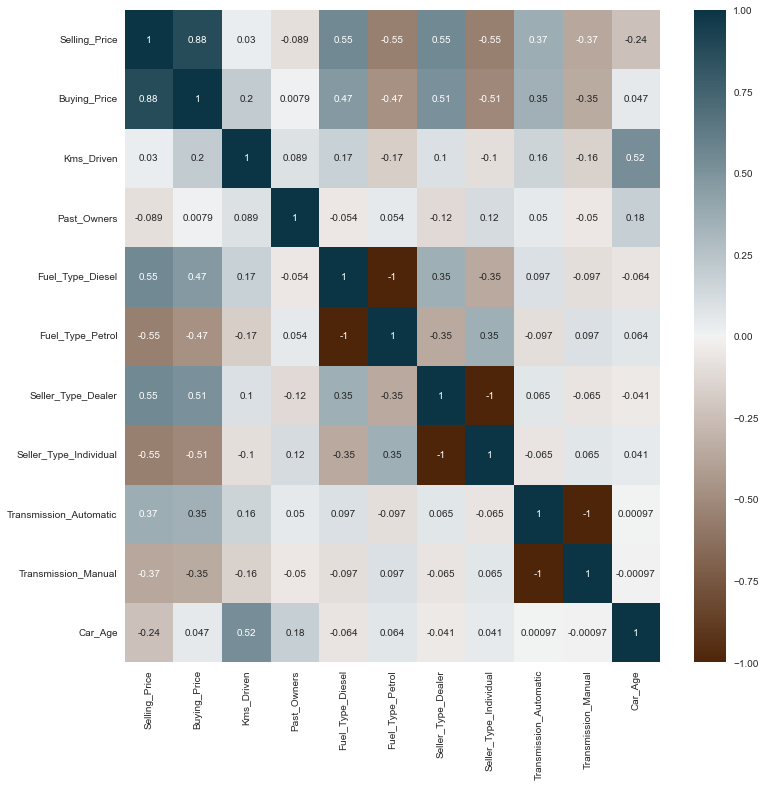

In [68]:
cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

#### high correlations with selling price:

In [69]:
corr_matrix = df.corr()
corralations = corr_matrix['Selling_Price'].sort_values(ascending = False) 
high_corr = (corralations > 0.2)|(corralations < -0.2)
pd.DataFrame(corralations[high_corr])
corralations[high_corr].index

Index(['Selling_Price', 'Buying_Price', 'Seller_Type_Dealer',
       'Fuel_Type_Diesel', 'Transmission_Automatic', 'Car_Age',
       'Transmission_Manual', 'Fuel_Type_Petrol', 'Seller_Type_Individual'],
      dtype='object')

- here we can see the features wich have a significant linear correlation with Selling Price:

### heatmap correlations which is greater then -+0.2:

heatmap of the high correlations with Selling Price:


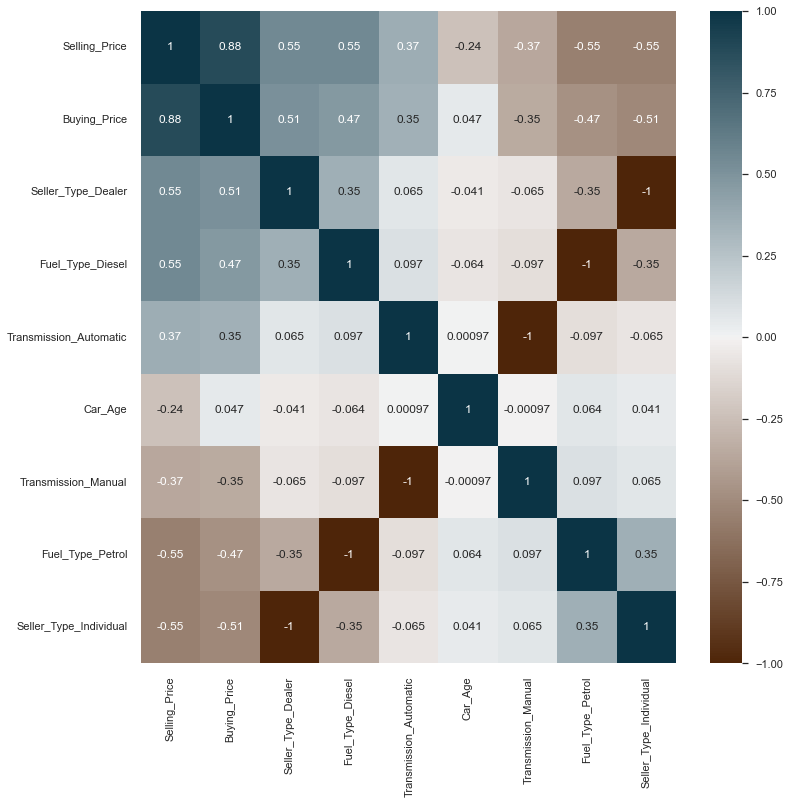

In [70]:
print("heatmap of the high correlations with Selling Price:")
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[corralations[high_corr].index].corr(),annot=True, cmap=cmap)
sns.set(font_scale=1)

### categorial features correlations:

C:\Users\gabi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gabi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gabi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gabi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Past_Owners', ylabel='Selling_Price'>

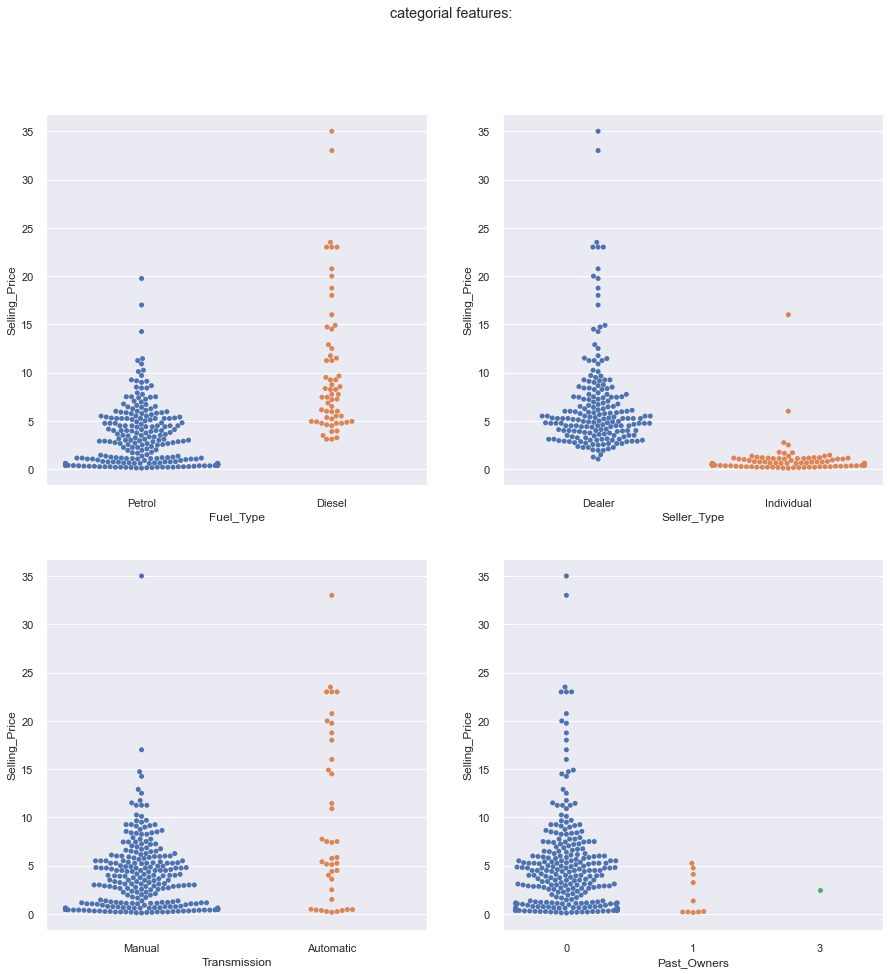

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('categorial features:')

sns.swarmplot(ax=axes[0,0], x="Fuel_Type", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[0,1], x="Seller_Type", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[1,0], x="Transmission", y="Selling_Price", data=df_copy)
sns.swarmplot(ax=axes[1,1], x="Past_Owners", y="Selling_Price", data=df_copy)

### numerical features correlations:

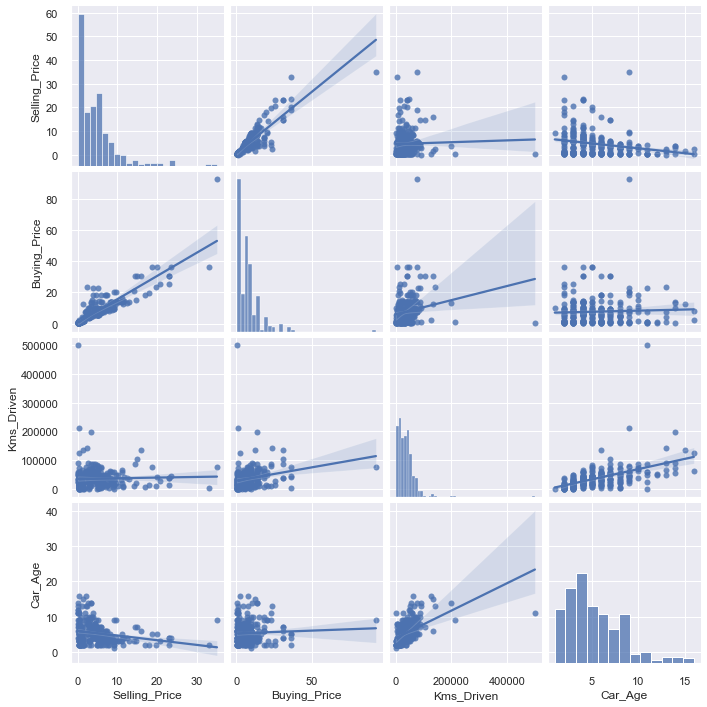

In [72]:
sns.pairplot(df[['Selling_Price', 'Buying_Price', 'Kms_Driven', 'Car_Age']], kind='reg')

#### to get a better understanding of the Age affect we will plot it another way:

This bar plot represents an estimate of central tendency for a Selling-Price with the height of each rectangle and provides some indication of the uncertainty around that estimate price using error bars.


C:\Users\gabi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Selling Price range by Car Age')

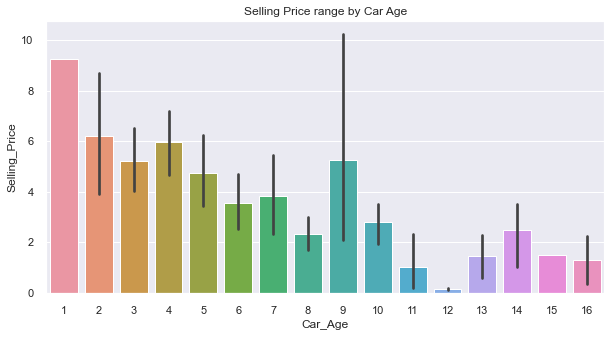

In [73]:
print('This bar plot represents an estimate of central tendency for a Selling-Price with the height of each rectangle and provides some indication of the uncertainty around that estimate price using error bars.')
fig = plt.figure(figsize=(10,5))
sns.barplot('Car_Age','Selling_Price',data=df).set_title('Selling Price range by Car Age')

# <ins> E. Select a Performance Measure </ins>

We will use 2 performance measurements: R2 and MAE.

<br>R2:
The coefficient of determination, R2 ("R squared"), is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

( source - https://en.wikipedia.org/wiki/Coefficient_of_determination )

in simple words, R2 is the percentage of the explained variance from the general variance.
<br>The percentage of explained variance allows us to know how much of the variance of the dependent variable is explained by the independent variables.<br>
The higher the percentage of explained variance, the more it means that X helps us predict Y.

MAE:

from these 3 metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

We chose MAE because it gives a basic, simple-to-understand assessment of the error that the model has.

# <ins> F. Test Set and Train Test + Scaling</ins>

In [74]:
X = df.drop(columns=['Selling_Price'])
Y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

- We will scale the data in 2 ways To see if there are significant differencesץ
### scaling the numerical features with StandardScaler and MinMax functions:

In [75]:
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

numerical_features = ['Buying_Price', 'Kms_Driven', 'Past_Owners', 'Car_Age']

# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])


In [76]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Buying_Price,Kms_Driven,Past_Owners,Car_Age
mean,7.930164e-18,-5.749369e-17,5.253734e-17,3.965082e-18
std,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00


In [77]:
print('note: the min is 0 and max is 1')
indexes = [False, False, False, True, False, False, False, True]
X_train_normalized.describe()[numerical_features].iloc[indexes]

note: the min is 0 and max is 1


,Buying_Price,Kms_Driven,Past_Owners,Car_Age
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


### Now we have scaled test set and train set, we can continue to find a good model!
<br> <br>

### but first, let's see the dummy model:

In [78]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
R2_score = dummy_regr.score(X_test, y_test)
y_predict = dummy_regr.predict(X_test)
mae = MAE(y_test, y_predict)
print('The dummy model have a R2 score of ' + str(R2_score)[:6] + " as expected (around 0), and mean absolute error of " + str(mae)[:4])

The dummy model have a R2 score of -0.003 as expected (around 0), and mean absolute error of 3.70


# <ins> G. Linear-Regression Model </ins>

In [79]:
LR = LinearRegression()

In [80]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(LR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

R2_scores_normalized = cross_val_score(LR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

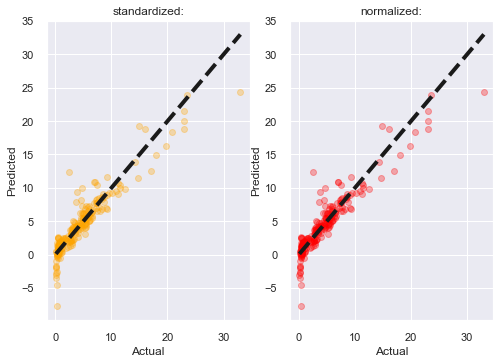

In [81]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='red')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

#### standadized train set cross validation:

In [82]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.9238542  0.91135592 0.88288836 0.90675351 0.69332822 0.65915647
 0.8269947  0.83843742 0.87613601 0.89128414]

mean R2 is: 0.841 with std of  0.087 and MAE of 1.1581


#### normalized train set cross validation:

In [83]:
print("the scores of cross validation are:")
print(R2_scores_normalized)
print()
print("mean R2 is: " + str(R2_scores_normalized.mean())[:5] + " with std of  " + str(R2_scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

the scores of cross validation are:
[0.9238542  0.91135592 0.88288836 0.90675351 0.69332822 0.65915647
 0.8269947  0.83843742 0.87613601 0.89128414]

mean R2 is: 0.841 with std of  0.087 and MAE of 1.1581


- this is preaty good, but we think that we can improve that with a creating new features!
- note: it looks like the scaling method isn't matter, we will check that later also. but you can see below that the values of the features are different.

In [84]:
X_train_normalized

,Buying_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
225,0.114453,0.265882,0.0,0,1,1,0,0,1,0.428571
78,0.405737,0.105882,0.0,1,0,1,0,0,1,0.071429
66,0.373712,0.411765,0.0,0,1,1,0,0,1,0.428571
296,0.297410,0.411454,0.0,0,1,1,0,0,1,0.571429
192,0.013005,0.232941,0.0,0,1,0,1,0,1,0.642857
...,...,...,...,...,...,...,...,...,...,...
188,0.011974,0.280000,0.0,0,1,0,1,0,1,0.642857
71,0.150097,0.200000,0.0,0,1,1,0,0,1,0.428571
106,0.032860,0.082353,0.0,0,1,0,1,0,1,0.071429
270,0.269563,0.127529,0.0,0,1,1,0,0,1,0.142857


In [85]:
X_train_standardized

,Buying_Price,Kms_Driven,Past_Owners,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
225,-0.403933,0.834631,-0.169419,0,1,1,0,0,1,0.955228
78,1.115789,-0.403718,-0.169419,1,0,1,0,0,1,-0.784374
66,0.948707,1.963713,-0.169419,0,1,1,0,0,1,0.955228
296,0.550615,1.961309,-0.169419,0,1,1,0,0,1,1.651069
192,-0.933221,0.579676,-0.169419,0,1,0,1,0,1,1.998990
...,...,...,...,...,...,...,...,...,...,...
188,-0.938596,0.943897,-0.169419,0,1,0,1,0,1,1.998990
71,-0.217963,0.324722,-0.169419,0,1,1,0,0,1,0.955228
106,-0.829630,-0.585828,-0.169419,0,1,0,1,0,1,-0.784374
270,0.405326,-0.236177,-0.169419,0,1,1,0,0,1,-0.436454


### We will make new featurs to use the data more efficiently:

In [86]:
# create 3 more features:
df['KMs_Per_year'] = df['Kms_Driven']/df['Car_Age']
df['Buying_Price_Age_ratio'] = df['Buying_Price']/df['Car_Age']
df['Buying_Price_KMs_ratio'] = df['Buying_Price']/df['Kms_Driven']
df.describe()[['KMs_Per_year', 'Buying_Price_Age_ratio', 'Buying_Price_KMs_ratio']]

,KMs_Per_year,Buying_Price_Age_ratio,Buying_Price_KMs_ratio
count,299.000000,299.000000,299.000000
mean,6759.328845,1.806317,0.000356
std,4575.118147,2.251820,0.000591
min,166.666667,0.040714,0.000001
25%,3775.000000,0.315000,0.000086
50%,6428.571429,1.316667,0.000194
75%,9000.000000,2.427333,0.000353
max,45454.545455,18.115000,0.006038


In [87]:
corr_matrix = df.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price             1.000000
Buying_Price_Age_ratio    0.934919
Buying_Price              0.879131
Seller_Type_Dealer        0.553425
Fuel_Type_Diesel          0.551948
Buying_Price_KMs_ratio    0.548595
Transmission_Automatic    0.366627
KMs_Per_year              0.262328
Kms_Driven                0.029546
Past_Owners              -0.088741
Car_Age                  -0.236047
Transmission_Manual      -0.366627
Fuel_Type_Petrol         -0.551948
Seller_Type_Individual   -0.553425
Name: Selling_Price, dtype: float64

- Buying_Price_Age_ratio is very significant.
- Buying_Price_KMs_ratio more significant than KMS alone.
- KMs_Per_year is more significant than KMS ang Car Age separately.

##### Let's see those correlations:

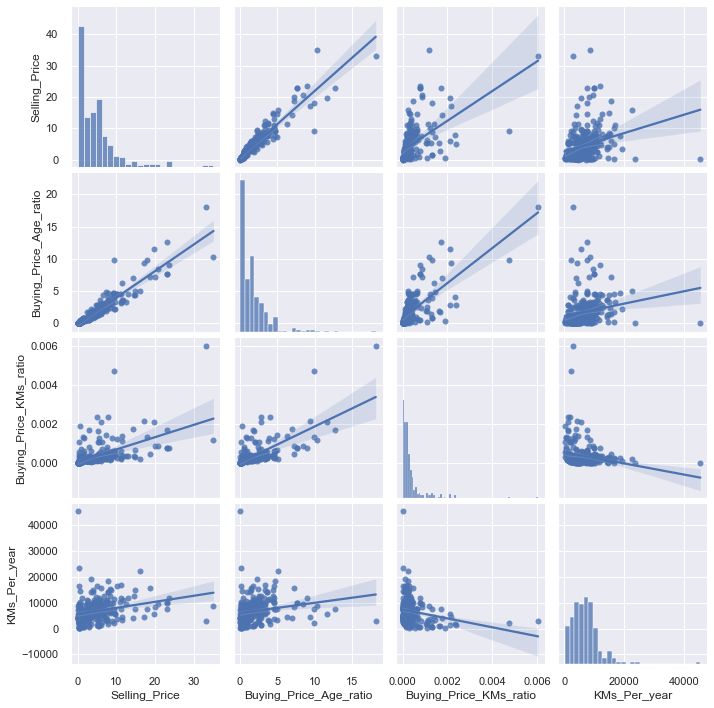

In [88]:
sns.pairplot(df[['Selling_Price', 'Buying_Price_Age_ratio', 'Buying_Price_KMs_ratio', 'KMs_Per_year']], kind='reg')

We will repeat the previous steps to include the new features in the train and test sets. 
<br>note: the test and train sets rows will not change because Im using the same random_state. so, the rows will remain the same in each set.

### Scaling the numerical features (including the new ones) with StandardScaler and MinMax functions:

In [89]:
# test train split
X = df.drop(columns=['Selling_Price'])
Y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

# scaling the numerical features
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

numerical_features = ['Buying_Price', 'Kms_Driven', 'Past_Owners', 'Car_Age', 'KMs_Per_year', 'Buying_Price_Age_ratio', 'Buying_Price_KMs_ratio']

# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])


In [90]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_standardized = cross_val_score(LR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

print('standartize:')
print('R2 score: ' + str(R2_standardized.mean())[:6])
print('R2 std: ' + str(R2_standardized.std())[:6])
print('MAE: ' + str(mae_standarsized)[:6])

print()

R2_normalized = cross_val_score(LR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

print('normalize: ')
print('R2 score: ' + str(R2_normalized.mean())[:6])
print('R2 std: ' + str(R2_normalized.std())[:6])
print('MAE: ' + str(mae_normalized)[:6])

standartize:
R2 score: 0.9436
R2 std: 0.0204
MAE: 0.7137

normalize: 
R2 score: 0.9436
R2 std: 0.0204
MAE: 0.7137


### This is a big improvment!
note that the results are still the same, it seems that normalization and standatization have the same affect on linear regression models.
<br>We will use only one of them the next step.

<br> We will try to increase the R2 with feature selection. 




## feature selection:

In [108]:
# We will use this function for make a copy of
# train set by specific correlation limit.

# copy X with columns which grater than specific limit:
def copy_by_corr_limit(X, lim, limits):
    X_copy = X.copy()
    s = (limits < lim)
    X_copy = X_copy[X_copy.columns[~s]]
    return X_copy

In [109]:
print('We will use the next list to select features by correlations')
print('correlations (without the sign+-):')
correlations = abs(corr_matrix['Selling_Price']).sort_values(ascending=False)
correlations.drop('Selling_Price', inplace=True)
correlations

We will use the next list to select features by correlations
correlations (without the sign+-):


Buying_Price_Age_ratio    0.934919
Buying_Price              0.879131
Seller_Type_Individual    0.553425
Seller_Type_Dealer        0.553425
Fuel_Type_Diesel          0.551948
Fuel_Type_Petrol          0.551948
Buying_Price_KMs_ratio    0.548595
Transmission_Automatic    0.366627
Transmission_Manual       0.366627
KMs_Per_year              0.262328
Car_Age                   0.236047
Past_Owners               0.088741
Kms_Driven                0.029546
Name: Selling_Price, dtype: float64

In [93]:
corr_limits = [0, 0.03, 0.09, 0.25, 0.35, 0.40, 0.55, 0.552, 0.555, 0.9]

mean_scores = []
std_scores = []
mae_scores = []

for limit in corr_limits:
    X_train_copy = copy_by_corr_limit(X_train_standardized, limit, correlations)
    R2_scores = cross_val_score(LR, X_train_copy, y_train, cv=kf)
    y_predict = cross_val_predict(LR, X_train_copy, y_train, cv=kf)
    mae_score = MAE(y_train, y_predict)

    
    mean_scores.append(R2_scores.mean())
    std_scores.append(R2_scores.std())
    mae_scores.append(mae_score)
    
pd.DataFrame(data={'lim correlation:':corr_limits, 'R2_score': mean_scores, 'R2_std': std_scores, 'MAE score': mae_scores}) 

,lim correlation:,R2_score,R2_std,MAE score
0,0.000,0.943682,0.020420,0.713764
1,0.030,0.943740,0.020252,0.713953
2,0.090,0.834060,0.112351,1.129761
3,0.250,0.841019,0.087597,1.158149
4,0.350,0.820258,0.117508,1.217651
5,0.400,0.814790,0.127190,1.219169
6,0.550,0.814790,0.127190,1.219169
7,0.552,0.817433,0.121175,1.215311
8,0.555,0.791201,0.130446,1.239433
9,0.900,0.758783,0.139454,1.271603


this is a minority improvment, so it is not significant. that is why We will go with 0.00 correlation limit.
## Testing our best linear regression model:

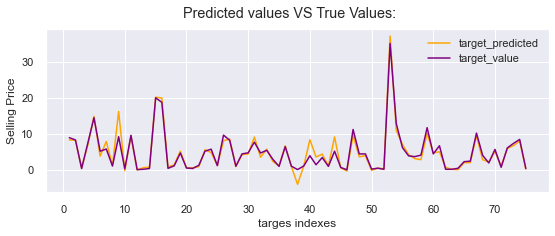

,R2_score,MAE score
test LR model,0.936109,0.814803


In [94]:
X_train_copy = copy_by_corr_limit(X_train_standardized, 0.00, correlations)
X_test_copy = copy_by_corr_limit(X_test_standardized, 0.00, correlations)

LR.fit(X_train_copy, y_train)
R2_score = LR.score(X_test_copy, y_test)
y_predict = LR.predict(X_test_copy)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test LR model'], data={'R2_score': R2_score, 'MAE score': mae_score})

<br>
<br>
<br>

# H. Random Forest Regressor model 

In [95]:
RFR = RandomForestRegressor()

In [96]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(RFR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(RFR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

R2_scores_normalized = cross_val_score(RFR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(RFR, X_train_normalized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

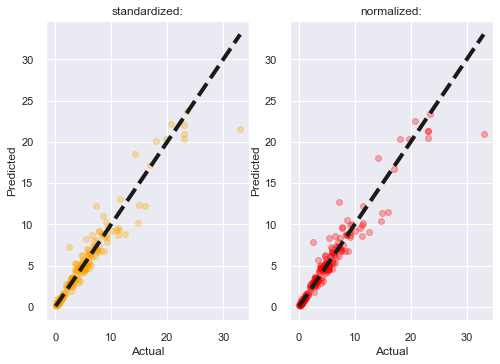

In [97]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(RFR, X_train_standardized, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(RFR, X_train_normalized, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='red')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

#### standadized train set cross validation:

In [98]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.98230058 0.9399454  0.96061495 0.94772252 0.95686765 0.85587252
 0.8591574  0.87095815 0.98147788 0.94336989]

mean R2 is: 0.929 with std of  0.046 and MAE of 0.6442


#### normalized train set cross validation:

In [99]:
print("the scores of cross validation are:")
print(R2_scores_normalized)
print()
print("mean R2 is: " + str(R2_scores_normalized.mean())[:5] + " with std of  " + str(R2_scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

the scores of cross validation are:
[0.98513414 0.94711932 0.95619792 0.94831014 0.94874918 0.86217039
 0.85177528 0.85981854 0.98095255 0.96073775]

mean R2 is: 0.930 with std of  0.048 and MAE of 0.6333


#### Those are great scores! let's see the score with the test set:

## Testing best Random forest Regressor model:

### Random Forest Regressor normalized data

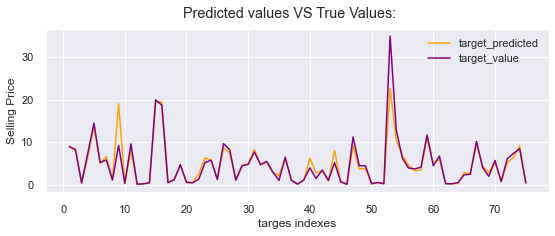

,R2_score,MAE score
test RFR model,0.87176,0.799492


In [110]:
RFR = RandomForestRegressor()

RFR.fit(X_train_normalized, y_train)
R2_score = RFR.score(X_test_normalized, y_test)
y_predict = RFR.predict(X_test_normalized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test RFR model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 


# I - SVM

### Linear SVM

In [102]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=0.1, max_iter=20000)

kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_standardized = cross_val_score(svm_reg, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(svm_reg, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

print('standartize:')
print('R2 score: ' + str(R2_standardized.mean())[:6])
print('R2 std: ' + str(R2_standardized.std())[:6])
print('MAE: ' + str(mae_standarsized)[:6])

print()

R2_normalized = cross_val_score(svm_reg, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(svm_reg, X_train_standardized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

print('normalize: ')
print('R2 score: ' + str(R2_normalized.mean())[:6])
print('R2 std: ' + str(R2_normalized.std())[:6])
print('MAE: ' + str(mae_normalized)[:6])

standartize:
R2 score: 0.9421
R2 std: 0.0286
MAE: 0.6684

normalize: 
R2 score: 0.8716
R2 std: 0.0297
MAE: 0.6683


- this is a good start!

- now we will use random search for optimize params:

In [103]:
from sklearn.model_selection import RandomizedSearchCV


epsilon = [int(x) for x in np.linspace(start = 0, stop = 5, num = 15)]
tol = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
C = [1e-2, 1e-1, 1, 5, 10, 20, 100]
loss = ['epsilon_insensitive', 'squared_epsilon_insensitive']
# Create the random grid
random_grid = {'epsilon': epsilon,
               'tol': tol,
               'C': C,
               'loss': loss}

# search across 100 different combinations
SVR_random = RandomizedSearchCV(estimator = svm_reg, param_distributions = random_grid, n_iter = 300, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
SVR_random.fit(X_train_standardized, y_train)

print("best R2 score is:")
print(SVR_random.best_score_)


Fitting 10 folds for each of 300 candidates, totalling 3000 fits
best R2 score is:
0.9462128165234361


In [105]:

print("best params:")
print(SVR_random.best_params_)

best params:
{'tol': 0.1, 'loss': 'squared_epsilon_insensitive', 'epsilon': 0, 'C': 5}


In [106]:
main_scores = pd.DataFrame(SVR_random.cv_results_)[['rank_test_score', 'mean_test_score', 'param_tol', 'param_loss', 'param_epsilon', 'param_C']]
main_scores.sort_values(by=['rank_test_score']).head(10)


,rank_test_score,mean_test_score,param_tol,param_loss,param_epsilon,param_C
138,1,0.946213,0.1,squared_epsilon_insensitive,0,5
165,2,0.944673,0.1,epsilon_insensitive,1,1
181,3,0.944610,0.01,squared_epsilon_insensitive,0,0.1
202,4,0.944364,0.01,squared_epsilon_insensitive,0,20
104,5,0.944180,0.01,squared_epsilon_insensitive,0,100
281,6,0.943901,0.001,squared_epsilon_insensitive,0,1
77,7,0.943896,0.001,squared_epsilon_insensitive,0,1
218,8,0.943858,0.001,squared_epsilon_insensitive,0,1
247,9,0.943808,0.001,squared_epsilon_insensitive,0,20
222,10,0.943729,0.0001,squared_epsilon_insensitive,0,5


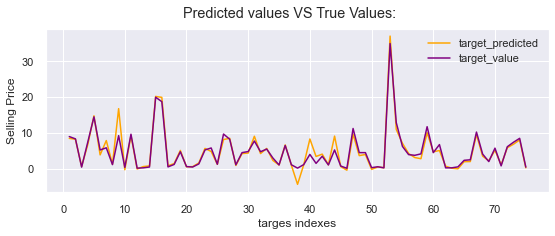

,R2_score,MAE score
test SVM model,0.932775,0.809195


In [107]:
best_SVR = SVR_random.best_estimator_

best_SVR.fit(X_train_standardized, y_train)
R2_score = best_SVR.score(X_test_standardized, y_test)
y_predict = best_SVR.predict(X_test_standardized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test SVM model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 


- this is very close to beat the goal!
- let's check non-linear SVM:

## Non-Linear SVM:

In [87]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, max_iter=20000)

kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_standardized = cross_val_score(svm_poly_reg, X_train_normalized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(svm_poly_reg, X_train_normalized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_normalized)

print('standartize:')
print('R2 score: ' + str(R2_standardized.mean())[:6])
print('R2 std: ' + str(R2_standardized.std())[:6])
print('MAE: ' + str(mae_standarsized)[:6])

print()

standartize:
R2 score: 0.9662
R2 std: 0.0166
MAE: 0.6683



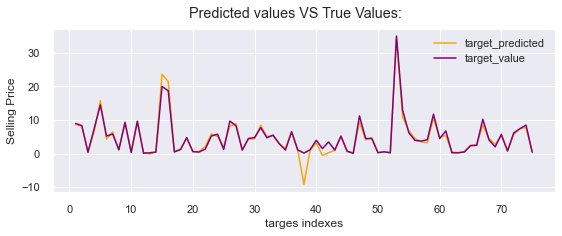

,R2_score,MAE score
test SVM model,0.934928,0.681182


In [80]:
svm_poly_reg.fit(X_train_normalized, y_train)
R2_score = svm_poly_reg.score(X_test_normalized, y_test)
y_predict = svm_poly_reg.predict(X_test_normalized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test SVM model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 


## Ensemble Model - Voting Model:

#### for using ensemle method as voting regressor, we will make piplines for each predictor. the reason is - some of them work better with MinMaxScaler and the other with StandardScaler. so using the pipline we will use the original X_train and each pipline will scale it individualy.

cross validation:
R2 score: 0.9606
R2 std: 0.0175
MAE: 0.5864

TEST:


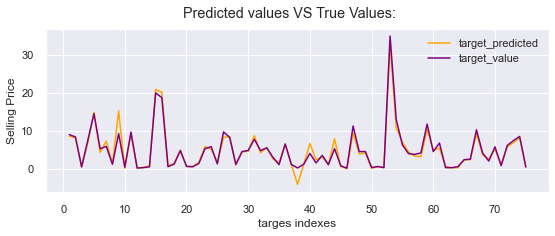

,R2_score,MAE score
test SVM model,0.955604,0.66659


In [81]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

svm_poly_reg = make_pipeline(MinMaxScaler(), SVR(kernel="poly", degree=2, C=100, epsilon=0.1, max_iter=20000))
svm_lin_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=0, max_iter=20000, tol= 0.01, loss= 'squared_epsilon_insensitive', C= 0.1))
RF_reg = make_pipeline(MinMaxScaler(), RandomForestRegressor())
LR_reg = make_pipeline(StandardScaler(), LinearRegression())

from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators=[('svm_poly_reg', svm_poly_reg), ('svm_lin_reg', svm_lin_reg), ('RF_reg', RF_reg), ('LR_reg', LR_reg)])

kf = KFold(n_splits=10, random_state=42, shuffle=True)
R2 = cross_val_score(voting_reg, X_train, y_train, cv=kf)
y_predict = cross_val_predict(voting_reg, X_train, y_train, cv=kf)
mae = MAE(y_train, y_predict)

print('cross validation:')
print('R2 score: ' + str(R2.mean())[:6])
print('R2 std: ' + str(R2.std())[:6])
print('MAE: ' + str(mae)[:6])

print()
print("TEST:")
voting_reg.fit(X_train, y_train)
R2_score = voting_reg.score(X_test, y_test)
y_predict = voting_reg.predict(X_test)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test SVM model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 


# J. adaboost


C:\Users\idank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\idank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\idank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\idank\AppData\Local\Packages\PythonSoftwareFounda

cross validation:
R2 score: 0.9651
R2 std: 0.0141
MAE: 0.5629

TEST:


C:\Users\idank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\idank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


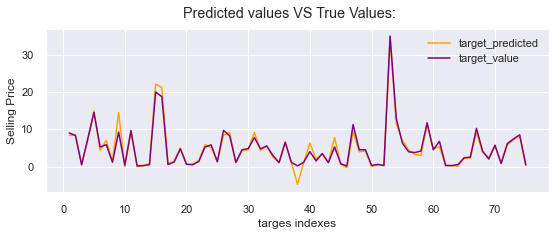

,R2_score,MAE score
test ADABOOST model,0.957645,0.648801


In [93]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(voting_reg, n_estimators=200, learning_rate=0.5)

kf = KFold(n_splits=10, random_state=42, shuffle=True)
R2 = cross_val_score(ada_reg, X_train_normalized, y_train, cv=kf)
y_predict = cross_val_predict(ada_reg, X_train_normalized, y_train, cv=kf)
mae = MAE(y_train, y_predict)

print('cross validation:')
print('R2 score: ' + str(R2.mean())[:6])
print('R2 std: ' + str(R2.std())[:6])
print('MAE: ' + str(mae)[:6])

print()
print("TEST:")
ada_reg.fit(X_train_normalized, y_train)
R2_score = ada_reg.score(X_test_normalized, y_test)
y_predict = ada_reg.predict(X_test_normalized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test ADABOOST model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 


C:\Users\idank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\idank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\idank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\idank\AppData\Local\Packages\PythonSoftwareFounda

cross validation:
R2 score: 0.9663
R2 std: 0.0142
MAE: 0.5637

TEST:


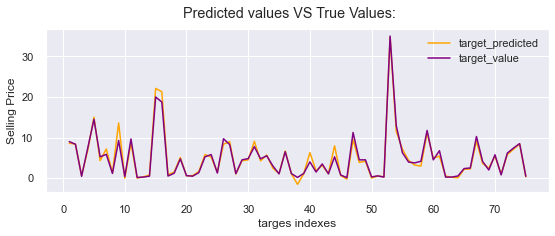

,R2_score,MAE score
test ADABOOST model,0.969775,0.616299


In [91]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(voting_reg, n_estimators=200, learning_rate=0.5)

kf = KFold(n_splits=10, random_state=42, shuffle=True)
R2 = cross_val_score(ada_reg, X_train, y_train, cv=kf)
y_predict = cross_val_predict(ada_reg, X_train, y_train, cv=kf)
mae = MAE(y_train, y_predict)

print('cross validation:')
print('R2 score: ' + str(R2.mean())[:6])
print('R2 std: ' + str(R2.std())[:6])
print('MAE: ' + str(mae)[:6])

print()
print("TEST:")
ada_reg.fit(X_train, y_train)
R2_score = ada_reg.score(X_test, y_test)
y_predict = ada_reg.predict(X_test)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test ADABOOST model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 


### in conclusion:
#### best R2 we found is 0.97 using adaboost model!

#### It is important to note that we do not have OVERFITTING at all in this model.
##### It can be seen that the score on the TRAIN is really close to the score on the TEST, which indicates that the model we developed is suitable for this data and not only for the specific sample of the TRAIN. This goal was achieved due to the use of suitable models and also with the help of CROSS-VALIDATION, so that even during training we make sure that there is no OVERFITTING.

## Answers to the questions we raised at the beginning of the project:

#### 1. Regression question - what is the price of a car given the information available on it?
##### The best model we found uses ADABOOST when it runs on a voting model that contains several other models. This model explains about 97% of the variation from the predicted variable (the price of the cars) and is wrong on average by around $600 per prediction.

#### 2. Which technique (model) is best suited for this data and why? 
##### The best model we found uses ADABOOST when it runs on a voting model that contains several other models. In our opinion, this model is the best because it contains an analysis of additional models, that is, it has an analysis of the data in several forms (according to the different models) and then there is an analysis in an "overview" - a kind of meta-analysis over the different analyses. The use of this ENSEMBLE method gives us the possibility to create this complex model.

#### 3. Is it possible to create new features from the existing data to improve the models?
##### Definitely. We created 3 new features at the beginning of the process and saw a significant improvement in our linear regression model.

#### 4. Which features are the most significant for predicting the price of a second-hand car?
##### Of course, there are different methods of testing the importance of the different features of the predicted variable and together to the model itself. The most standard method for finding the importance of features is testing a linear relationship with the outcome variable. After adding the new features, the 5 most significant features in terms of the linear relationship are (whith corralation value):
- Buying_Price_Age_ratio:    0.934919
- Buying_Price:              0.879131
- Seller_Type_Dealer:        0.553425
- Fuel_Type_Diesel:          0.551948
- Buying_Price_KMs_ratio:    0.548595


#### * A final note - there are many code notebooks on Kagle on this data, however, almost no one has achieved such good results. These results were achieved mainly thanks to the addition of the new features to the data (based on a number of existing features) which give us additional and significant information.

### what can we do better?

- handle outliers.
- grid search on all the models to find best parameters (We tried but it took so much time).
- check more algoritems (more models types).